<a href="https://colab.research.google.com/github/soaresbru/desafio-Qconcurso/blob/main/Acerta_Quest%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>O Desafio de Aprendizagem Adaptativa</center>
# <center>Qconcurso - SigmaGeek</center>
___

Esta é a primeira competição que participo.
  
Resolvendo o case em apenas 2 dias e ficando entre os 28% melhores.  

Eu sabia que tinha pouco tempo para fazer então tentei entregar um produto rápido e que já serviria de alguma forma, tentando implementar o conceito de MVP (Produto mínimo viável)

## Conteúdo
1. Leitura das bases consumidas
2. Análise dos dados
3. Engenharia de Variáveis
4. Treinando o modelo
5. Criando o modelo para submissão

## 1. Leitura das Bases

Nesta etapa, as bibliotecas utilizadas serão importadas e base de dados para análise serão carregados



In [ ]:
# Importando as bibliotecas padrões
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando a biblioteca para carregar arquivos do drive
from google.colab import drive

# Importando a biblioteca para fazer a normalização
from sklearn.preprocessing import StandardScaler

# Separando em treino e teste
from sklearn.model_selection import train_test_split

# Importando bibliotecas para realização de gráficos
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Importando as bibliotecas do modelo
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# Importando a biblioteca de métrica
from sklearn.metrics import f1_score 


In [ ]:
# Montando Google Drive
drive.mount('/content/drive')
caminho = '/content/drive/MyDrive/Dataset - projetos dados/QConcursos/'      

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lendo o arquivo de dados
df_dataset = pd.read_csv(caminho+'Dataset_model.csv')
df_subjects = pd.read_csv(caminho+'subjects_questions.csv')
df_teste = pd.read_csv(caminho+'Submit.csv', delimiter=';')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 2. Análise dos dados

Nesta etapa o objetivo é conhecer melhor os nossos dados para facilitar no entendimento do problema e na tomada de decisão

In [ ]:
# Olhando as primeiras linhas do arquivo
df_dataset.head()

,novo_user_id,city,country,device,device_type,os,platform,region,gp:carrers,gp:college type,...,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id,novo_question_id
0,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,A,2.0,489400
1,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,C,2.0,489399
2,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,D,2.0,489398
3,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,A,2.0,489397
4,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,E,2.0,489396


In [ ]:
# olhando algumas informações como o tipo de cada coluna
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   novo_user_id            int64  
 1   city                    object 
 2   country                 object 
 3   device                  object 
 4   device_type             object 
 5   os                      object 
 6   platform                object 
 7   region                  object 
 8   gp:carrers              object 
 9   gp:college type         object 
 10  gp:degree course        object 
 11  gp:previous experience  object 
 12  gp:school type          object 
 13  gp:segment              object 
 14  gp:source_project       object 
 15  acertou                 int64  
 16  created_at              object 
 17  row                     int64  
 18  commented_by_professor  float64
 19  difficulty              float64
 20  discipline_id           float64
 21  examining_board_id      float64

In [ ]:
# olhando os dados nulos
df_dataset.isnull().sum().sort_values(ascending=False)

gp:school type            1997500
gp:degree course          1997500
gp:college type           1997500
gp:previous experience    1052200
device_type                163200
city                       142400
gp:carrers                 116900
device                      71600
gp:source_project           38000
gp:segment                  35200
region                      13700
platform                    13200
os                          13200
country                     13200
difficulty                   2629
publication_year              187
institute_id                  182
examining_board_id            182
outdated                      178
nullified                     178
modality_id                   178
knowledge_area_id             178
product_id                    178
discipline_id                 178
commented_by_professor        178
right_answer                  178
scholarity_id                 178
novo_user_id                    0
created_at                      0
row           

In [ ]:
#Vemos que temos 20000 pessoas diferentes
df_dataset['novo_user_id'].value_counts().sort_values(ascending=False)

1        100
12       100
5        100
6        100
7        100
        ... 
19997    100
19998    100
19999    100
19984    100
20000    100
Name: novo_user_id, Length: 20000, dtype: int64

In [ ]:
# Temos diferentes cidades, é interessante notar que as principais cidades que são clientes da Qconcurso, são Brasília, Rio de Janeiro e São Paulo
# Porém parece que essa informação no primeiro momento não será tão importante pro modelo, além de ter muitas cidades diferentes (1799 ao todo), podendo ser prejudicial ao tempo rquerido
df_dataset['city'].value_counts().sort_values(ascending=False)

Brasília          167300
Rio de Janeiro    112100
São Paulo         108100
Fortaleza          69300
Manaus             50000
                   ...  
Campo Largo          100
Tambau               100
Itagi                100
Brasileira           100
Boraceia             100
Name: city, Length: 1799, dtype: int64

In [ ]:
# o brasil domina a amostra, talvez faça sentido dividir entre brasil e exterior
# porém mesmo fazendo isso a diferença da quantidade é muito grande e provavelmente não vai ser bom pro modelo
df_dataset['country'].value_counts().sort_values(ascending=False)

Brazil                  1983600
United States               800
Portugal                    300
Switzerland                 300
Spain                       200
Argentina                   200
Australia                   200
Netherlands                 200
Bolivia                     100
France                      100
Angola                      100
Mexico                      100
Germany                     100
United Arab Emirates        100
Sweden                      100
Canada                      100
Colombia                    100
Denmark                     100
Name: country, dtype: int64

In [ ]:
# São muito aparelhos diferentes 
# Não aparenta ter uma relação clara
df_dataset['device'].value_counts().sort_values(ascending=False)

Windows                 1139600
Apple iPhone             166100
Samsung Phone            130300
Motorola Phone           102400
Samsung Galaxy Phone      93400
                         ...   
LG LM-X120                  100
ATM EastAeon R5Plus         100
HIT P10a                    100
RMX3231                     100
Amazon KFMAWI               100
Name: device, Length: 217, dtype: int64

In [ ]:
# São muito aparelhos diferentes 
# Não aparenta ter uma relação clara
df_dataset['device_type'].value_counts().sort_values(ascending=False)

Windows                       1139600
Mac                             46500
Apple iPhone                    41800
Apple iPhone 11                 25000
Samsung Galaxy Tab S6 Lite      15800
                               ...   
Motorola moto e5                  100
Realme C15                        100
Samsung Galaxy View               100
Samsung Galaxy S4                 100
Multilaser MS50L                  100
Name: device_type, Length: 394, dtype: int64

In [ ]:
# São muito aparelhos diferentes 
# Não aparenta ter uma relação clara
df_dataset['os'].value_counts().sort_values(ascending=False)

Chrome 103            482900
Chrome 104            432400
Chrome 102            127900
android 11            104000
android 10             66800
                       ...  
Chrome 68                100
Chrome WebView 101       100
Samsung Browser 10       100
Instagram 244            100
Opera 69                 100
Name: os, Length: 231, dtype: int64

In [ ]:
# Pode ser um dado relevante
df_dataset['platform'].value_counts().sort_values(ascending=False)

Web        1597200
Android     282200
iOS         107400
Name: platform, dtype: int64

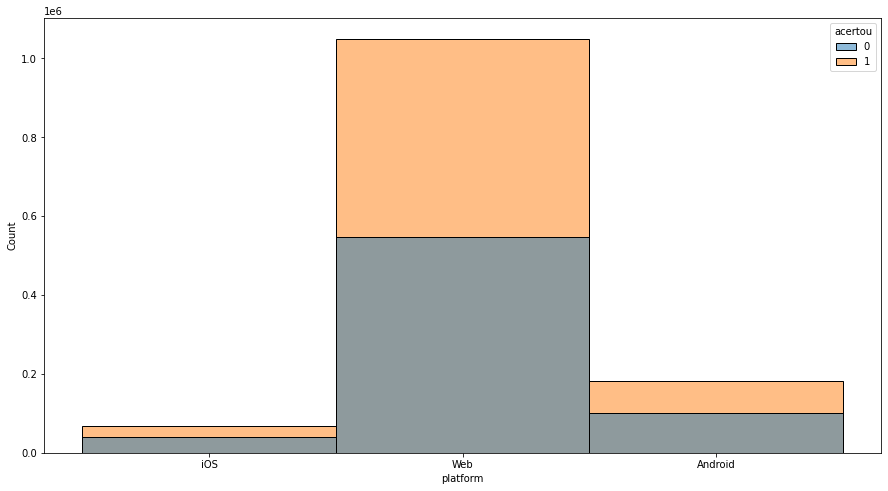

In [ ]:
# Parece que os erros ocorrem na mesma proporção
# Também posso tentar diferenciar em WEb e outros(IOS + android)
plt.subplots(figsize=(15,8))
sns.histplot(data = df_dataset, x = df_dataset['platform'], hue = 'acertou')
plt.show()

In [ ]:
# Regiões de alunos com maior número de questões
df_dataset['region'].value_counts().sort_values(ascending=False)

Sao Paulo              251700
Rio de Janeiro         204200
Federal District       179900
Minas Gerais           154100
Ceara                  120100
Bahia                  119300
Pernambuco             106900
Rio Grande do Sul       92400
Goias                   91100
Parana                  64000
Santa Catarina          60200
Amazonas                59300
Paraíba                 58500
Para                    51200
Piaui                   46800
Rio Grande do Norte     41800
Alagoas                 36500
Maranhao                35800
Espirito Santo          34800
Mato Grosso             31400
Mato Grosso do Sul      27900
Rondonia                26800
Sergipe                 26600
Amapa                   25300
Tocantins               16300
Acre                    11300
Roraima                  9500
Florida                   200
Victoria                  200
North Holland             200
Dubai                     100
Geneva                    100
Barcelona                 100
Texas     

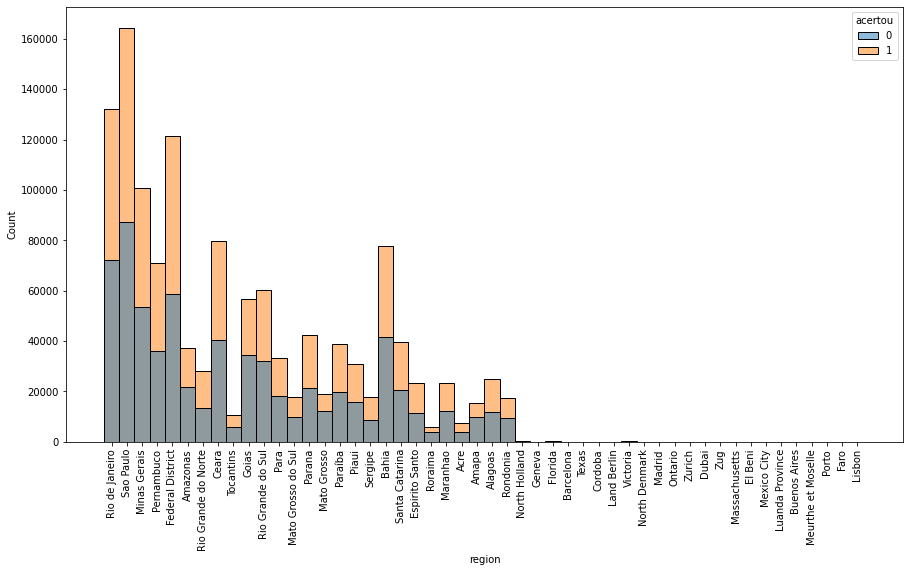

In [ ]:
# Vemos que as diferentes regiões podem influenciar
plt.subplots(figsize=(15,8))
sns.histplot(data = df_dataset, x = df_dataset['region'], hue = 'acertou')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# No primeiro momento pode ser um dado relevante vamos manter
df_dataset['gp:carrers'].value_counts().sort_values(ascending=False)

Policial                                                                                                         486700
Jurídica                                                                                                         165500
Outras                                                                                                           135700
Tribunal                                                                                                         121500
Administrativa                                                                                                    84200
                                                                                                                  ...  
Policial, Jurídica, Policial                                                                                        100
Educação, Tribunal, Administrativa, Legislativa                                                                     100
Policial, Tribunal, Controle e Gestão, F

In [ ]:
# Apenas 2500 dados para essa coluna, poucos dados, melhor excluir
df_dataset['gp:college type'].value_counts().sort_values(ascending=False)

["Pública"]    1900
["Privada"]     600
Name: gp:college type, dtype: int64

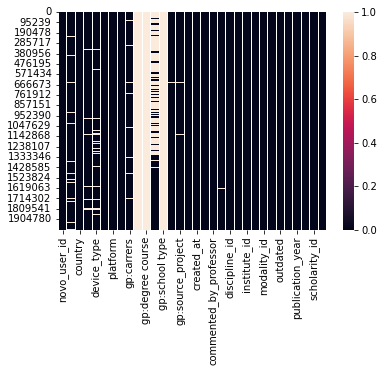

In [ ]:
# Vemos que realmente essacoluna está com muitos dados faltantes
sns.heatmap(df_dataset.isnull())

In [ ]:
# Esse também possui muitos dados faltantes
df_dataset['gp:degree course'].value_counts().sort_values(ascending=False)

["ADMINISTRACAO"]                                                    700
["DIREITO"]                                                          300
["MEDICINA"]                                                         200
["ADMINISTRACAO","ANALISE E DESENVOLVIMENTO DE SISTEMAS"]            100
["QUIMICA"]                                                          100
["JORNALISMO"]                                                       100
["ANALISE E DESENVOLVIMENTO DE SISTEMAS"]                            100
["CIENCIAS CONTABEIS"]                                               100
["ADMINISTRACAO","PEDAGOGIA","LETRAS - LINGUA PORTUGUESA"]           100
["ANALISE E DESENVOLVIMENTO DE SISTEMAS","ADMINISTRACAO PUBLICA"]    100
["ODONTOLOGIA"]                                                      100
["GESTAO DE SEGURANCA PRIVADA"]                                      100
["ENFERMAGEM","MEDICINA","ODONTOLOGIA"]                              100
["CIENCIAS BIOLOGICAS"]                            

In [ ]:
# Este parece ser um dos dados mais relevantes
df_dataset['gp:previous experience'].value_counts().sort_values(ascending=False)

beginner            546200
experient           270900
professional         93200
highly_experient     37500
Name: gp:previous experience, dtype: int64

In [ ]:
# Muitos dados faltantes também
df_dataset['gp:school type'].value_counts().sort_values(ascending=False)

["Escola Pública"]                                      1100
["Estudo por conta própria"]                             600
["Cursinho Preparatório"]                                300
["Escola Privada"]                                       300
["Escola Privada","Escola Pública"]                      100
["Estudo por conta própria","Cursinho Preparatório"]     100
Name: gp:school type, dtype: int64

In [ ]:
# Talvez faça sentido manter, parece que tem relevancia pois as questões de concurso militar ser mais dificil que Enem por exemplo
df_dataset['gp:segment'].value_counts().sort_values(ascending=False)

Concurso Público    1889800
Concurso Militar      74200
OAB                     600
Enem                    200
Name: gp:segment, dtype: int64

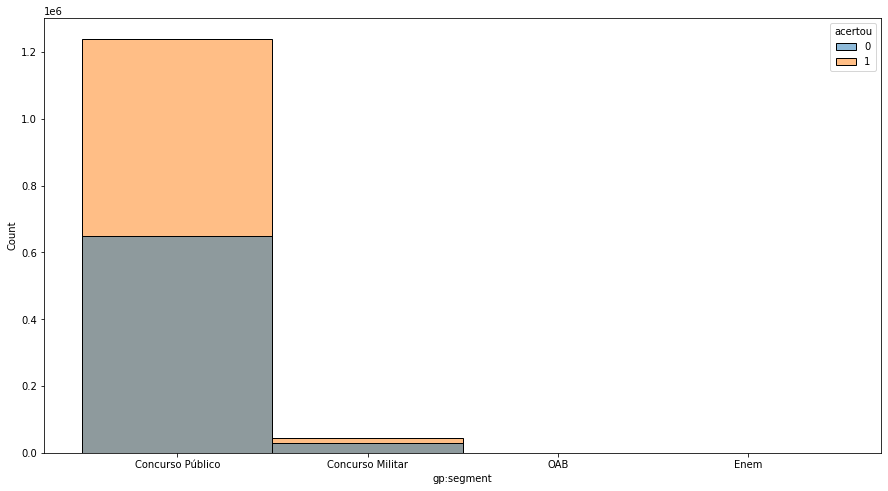

In [ ]:
# Fazendo o gráfico do segmento
plt.subplots(figsize=(15,8))
sns.histplot(data = df_dataset, x = df_dataset['gp:segment'], hue = 'acertou')
plt.show()

In [ ]:
# Essa é a preferencia do usuario
df_dataset['gp:source_project'].value_counts().sort_values(ascending=False)

odin    1728500
ils      233500
Name: gp:source_project, dtype: int64

In [ ]:
# A maioria das questões são acertadas
df_dataset['acertou'].value_counts().sort_values(ascending=False)

1    1308561
0     691439
Name: acertou, dtype: int64

In [ ]:
# Será que a data influencia? teoricamente se a questão for nova é provavalemnte que pouca gente tenha visto e é mais fácil errar
df_dataset['created_at'].sort_values(ascending=False)

1999799    2022-08-12 21:53:33
1999798    2022-08-12 21:52:51
1999797    2022-08-12 21:52:21
1999796    2022-08-12 21:51:31
1999795    2022-08-12 21:51:05
                  ...         
1704       2008-06-11 06:02:14
1703       2008-06-11 06:02:10
1702       2008-06-11 06:02:05
1701       2008-06-11 06:01:47
1700       2008-06-11 06:00:54
Name: created_at, Length: 2000000, dtype: object

In [ ]:
# Verificando a quantidade questôes por linhas
df_dataset['row'].value_counts().sort_values(ascending=False)

1      20000
13     20000
3      20000
4      20000
5      20000
       ...  
97     20000
98     20000
99     20000
78     20000
100    20000
Name: row, Length: 100, dtype: int64

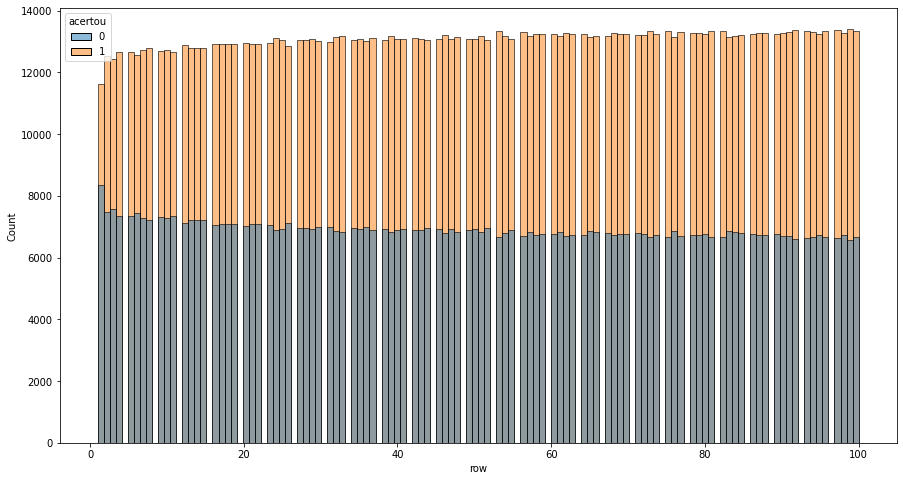

In [ ]:
# Plotando o gráfico vemos que aumentando a linha temos uma tendencia de alta
plt.subplots(figsize=(15,8))
sns.histplot(data = df_dataset, x = df_dataset['row'], hue = 'acertou')
plt.show()

In [ ]:
df_dataset['commented_by_professor'].value_counts().sort_values(ascending=False)

1.0    1107123
0.0     892699
Name: commented_by_professor, dtype: int64

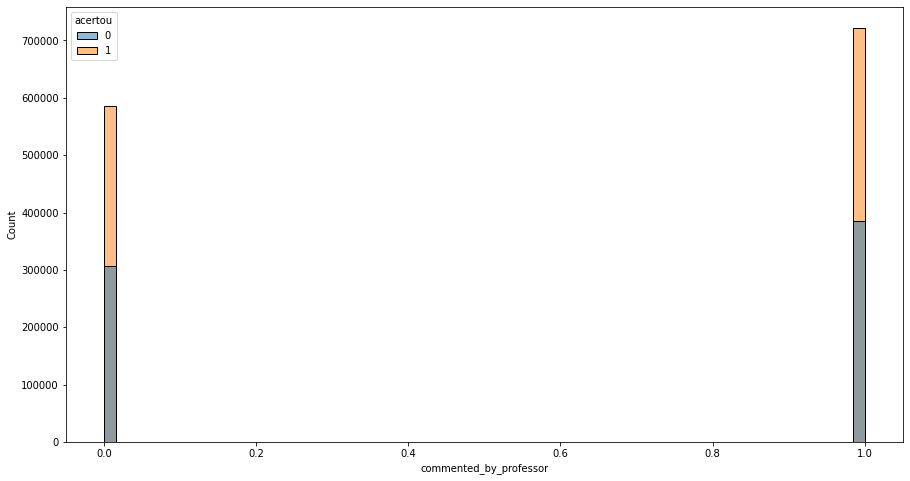

In [ ]:
# Não tem tanta diferença entre os acertos em questôes que o professor comenta ou não
plt.subplots(figsize=(15,8))
sns.histplot(data = df_dataset, x = df_dataset['commented_by_professor'], hue = 'acertou')
plt.show()

In [ ]:
# Esta parece ser uma variável muito importante
df_dataset['difficulty'].value_counts().sort_values(ascending=False)

2.0    804260
1.0    640501
3.0    465835
4.0     85528
5.0      1247
Name: difficulty, dtype: int64

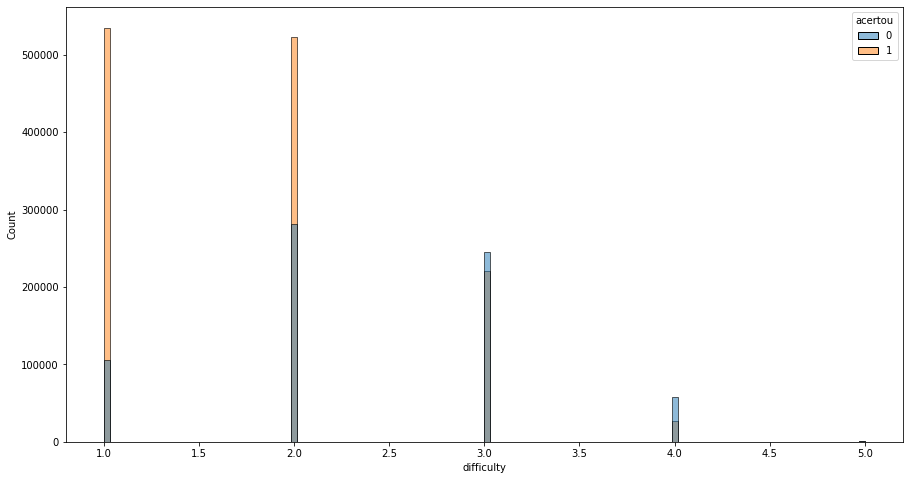

In [ ]:
# Plotando o gráfico da quantidade de questões por nivel de dificuldade e se acartam ou não
plt.subplots(figsize=(15,8))
sns.histplot(data = df_dataset, x = df_dataset['difficulty'], hue = 'acertou')
plt.show()

In [ ]:
df_dataset['discipline_id'].value_counts().sort_values(ascending=False)

1.0      306971
3.0      255943
2.0      200228
9.0      183573
46.0      95535
          ...  
226.0         2
416.0         1
427.0         1
590.0         1
293.0         1
Name: discipline_id, Length: 225, dtype: int64

In [ ]:
# Banca da questão
df_dataset['examining_board_id'].value_counts().sort_values(ascending=False)

2.0       586039
1.0       185138
63.0      169544
152.0     167605
189.0      59440
           ...  
2637.0         1
2664.0         1
177.0          1
409.0          1
2452.0         1
Name: examining_board_id, Length: 580, dtype: int64

In [ ]:
df_dataset['institute_id'].value_counts().sort_values(ascending=False)

6152.0    40932
36.0      35730
5713.0    28962
123.0     25676
6281.0    23470
          ...  
9451.0        1
7459.0        1
1897.0        1
7334.0        1
2070.0        1
Name: institute_id, Length: 3099, dtype: int64

In [ ]:
df_dataset['knowledge_area_id'].value_counts().sort_values(ascending=False)

9.0      1111882
14.0      321206
13.0      114349
15.0       80547
2.0        68760
          ...   
299.0          2
276.0          1
165.0          1
208.0          1
323.0          1
Name: knowledge_area_id, Length: 94, dtype: int64

In [ ]:
# Esse dado é bem importante, pois do tipo 1 você tem 20% de acertar chutando, e do tipo 2 você tem 50% de chance de acertar
df_dataset['modality_id'].value_counts().sort_values(ascending=False)

1.0    1505832
2.0     493990
Name: modality_id, dtype: int64

In [ ]:
# Tem que apagar as questões anuladas, pois não importa se a pessoa acertou ou não
df_dataset['nullified'].value_counts().sort_values(ascending=False)

0.0    1994668
1.0       5154
Name: nullified, dtype: int64

In [ ]:
# Tem que apagar as questões desatualizadas, pois não importa se a pessoa acertou ou não
df_dataset['outdated'].value_counts().sort_values(ascending=False)

0.0    1964150
1.0      35672
Name: outdated, dtype: int64

In [ ]:
# Contando o produto
df_dataset['product_id'].value_counts().sort_values(ascending=False)

1.0    1832006
5.0     112598
7.0      43794
3.0       6929
9.0       4495
Name: product_id, dtype: int64

In [ ]:
# Contando o ano de publicação
df_dataset['publication_year'].value_counts().sort_values(ascending=False)

2018.0    324463
2019.0    307984
2021.0    216724
2017.0    195361
2016.0    166639
2015.0    125118
2014.0    110668
2020.0    108820
2013.0    100988
2022.0     76128
2012.0     69254
2010.0     48834
2011.0     36207
2009.0     31502
2008.0     26449
2007.0     14285
2003.0     12343
2006.0     10141
2004.0     10042
2005.0      5170
2002.0      1659
2000.0       831
2001.0       203
Name: publication_year, dtype: int64

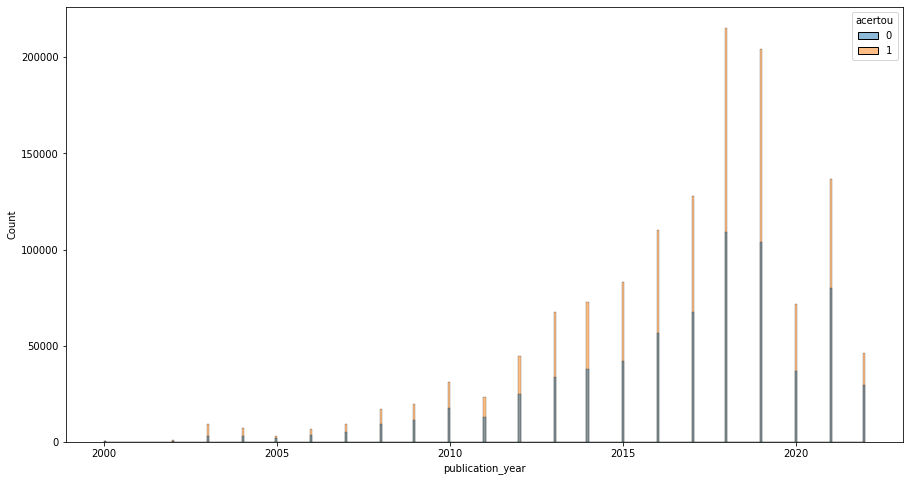

In [ ]:
# Parece não haver uma relação clara entre ano e acrto de questões
plt.subplots(figsize=(15,8))
sns.histplot(data = df_dataset, x = df_dataset['publication_year'], hue = 'acertou')
plt.show()

In [ ]:
# A maioria das questões tem como resposta certa C ou E, faz sentido pois C e E pode estar tanto nas questões de certo ou errado, e nas questões de marcar
df_dataset['right_answer'].value_counts().sort_values(ascending=False)

C    571076
E    471281
D    321375
B    318455
A    317595
X        38
*         1
+         1
Name: right_answer, dtype: int64

In [ ]:
df_dataset['scholarity_id'].value_counts().sort_values(ascending=False)

3.0    1316353
2.0     640697
1.0      42772
Name: scholarity_id, dtype: int64

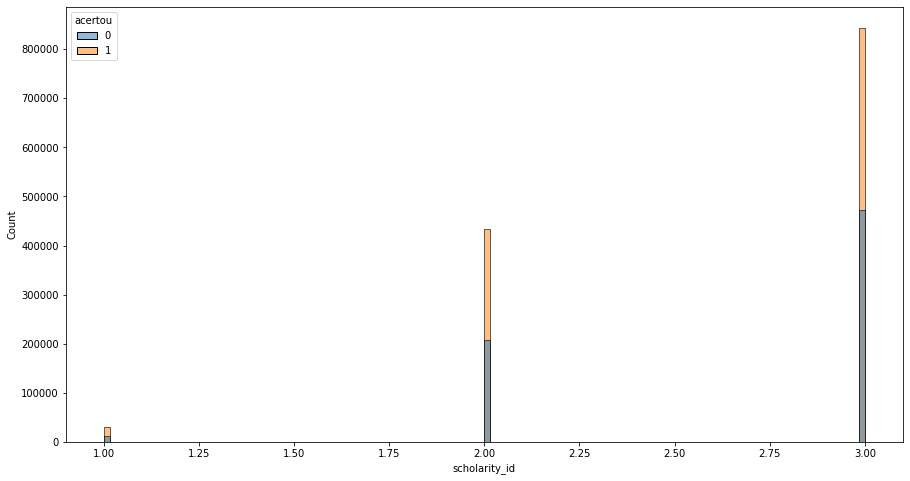

In [ ]:
plt.subplots(figsize=(15,8))
sns.histplot(data = df_dataset, x = df_dataset['scholarity_id'], hue = 'acertou')
plt.show()

In [ ]:
df_dataset['novo_question_id'].value_counts().sort_values(ascending=False)

289268    403
273475    317
289267    300
289257    283
311243    279
         ... 
249010      1
249009      1
383007      1
240966      1
428960      1
Name: novo_question_id, Length: 498263, dtype: int64

## 3. Engenharia de Variáveis

Nesta etapa o objetivo é tratar as informações previamente carregadas de modo a construir um dataset com as principais variáveis que possivelmente usaremos no modelo

In [ ]:
# Retirando as questões nulas e desatualizadas, pois o gabarito e está errado, então não faz sentido contabilizar e nem o estudante fazer
df_sem_anulada = df_dataset[df_dataset['nullified']==0]
df_sem_desatualizada = df_sem_anulada[df_sem_anulada['outdated']==0]

In [ ]:
variaveis_sem_desatualizada= ['novo_user_id', 'acertou', 'platform', 'row', 'difficulty', 'modality_id', 'commented_by_professor', 'publication_year', 'scholarity_id', 'product_id']
df_selecao = df_sem_desatualizada[variaveis_sem_desatualizada]
df_teste = df_teste[variaveis_sem_desatualizada]

In [ ]:
# Tranformando o tipo de plataforma em binário
def transform_platform(valor):
  if valor == "Web":
    return 0
  else:
    return 1

df_selecao['platform_bin']= df_selecao['platform'].map(transform_platform)
df_teste['platform_bin']= df_teste['platform'].map(transform_platform)

<ipython-input-51-682df92b36b7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecao['platform_bin']= df_selecao['platform'].map(transform_platform)


In [ ]:
# Verificando se as variavéis selecionadas possuem dados nulos
df_selecao.isnull().sum().sort_values(ascending=False)

platform                  12985
difficulty                 2404
publication_year              9
novo_user_id                  0
acertou                       0
row                           0
modality_id                   0
commented_by_professor        0
scholarity_id                 0
product_id                    0
platform_bin                  0
dtype: int64

In [ ]:
# Vamos retirar as questões possuem dados nulos na coluna difficulty
df_selecao = df_selecao.dropna(subset=['difficulty'], axis=0)

In [ ]:
# Observando se algum usuário ficou sem dados ou pouca quantidade
df_selecao['novo_user_id'].value_counts().sort_values(ascending=False)

20000    100
18666    100
18721    100
2589     100
18720    100
        ... 
3395      60
12391     59
14266     47
1157      39
19944     33
Name: novo_user_id, Length: 20000, dtype: int64

In [ ]:
#df_selecao = pd.get_dummies(df_selecao, columns =['modality_id'] )

In [ ]:
# Fazendo a divisão em treino e validação
Xy_treino, Xy_valid= train_test_split(df_selecao, test_size=0.3, random_state=0, stratify= df_selecao["novo_user_id"])

In [ ]:
Xy_treino

,novo_user_id,acertou,platform,row,difficulty,modality_id,commented_by_professor,publication_year,scholarity_id,product_id,platform_bin
1048751,10488,1,Web,52,1.0,1.0,0.0,2006.0,3.0,7.0,0
233438,2335,0,Web,39,1.0,2.0,0.0,2011.0,3.0,1.0,0
715327,7154,1,Web,45,1.0,1.0,0.0,2016.0,3.0,1.0,0
1227884,12279,1,Web,85,1.0,2.0,1.0,2019.0,3.0,1.0,0
1762106,17622,0,Android,7,3.0,2.0,1.0,2018.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1731704,17318,1,Web,5,1.0,2.0,0.0,2004.0,3.0,1.0,0
688736,6888,1,Web,37,1.0,1.0,0.0,2013.0,2.0,1.0,0
1490245,14903,0,Web,46,4.0,1.0,0.0,2016.0,3.0,1.0,0
643343,6434,1,Android,44,2.0,1.0,1.0,2019.0,3.0,1.0,1


In [ ]:
# Vamos calcular o acerto médio e a dificuldade média dos dados de treino
df_selecao_gb =Xy_treino.groupby(["novo_user_id"], as_index=False).agg({"acertou":'mean', 'difficulty': 'mean'})
df_selecao_gb = df_selecao_gb.rename(columns={"acertou": "media_acerto", 'difficulty': 'dificuldade_media'})

In [ ]:
# Criando uma coluna que relaciona o acerto médio com a quantidade média
df_selecao_gb['media_acerto_dificuldade'] = df_selecao_gb['media_acerto']*df_selecao_gb['dificuldade_media']

In [ ]:
# Juntando o arquivo de df_selecao_gb com os dados de treino, validação e teste
Xy_treino = Xy_treino.merge(df_selecao_gb, how='inner', on='novo_user_id')
Xy_valid = Xy_valid.merge(df_selecao_gb, how='inner', on='novo_user_id')
df_teste = df_teste.merge(df_selecao_gb, how='inner', on='novo_user_id')

In [ ]:
# Dividindo entre X e y de treino e validação
X_treino = Xy_treino.drop(columns= 'acertou')
y_treino = Xy_treino['acertou']

X_valid = Xy_valid.drop(columns= 'acertou')
y_valid = Xy_valid['acertou']

In [ ]:
# Selecionando as variáveis que de fato vão ser usadas no modelo
selecao= ['platform_bin','media_acerto','row', 'dificuldade_media', 'difficulty', 'modality_id']
X_treino = X_treino[selecao]
X_valid = X_valid[selecao]
df_teste = df_teste[selecao]

In [ ]:
# Apliquei Stardard Scaler, porém acabou performando pior
#selecao_stardard = ['platform_bin','media_acerto','row', 'dificuldade_media', 'difficulty', 'modality_id']
#scaler = StandardScaler()
#X_treino = scaler.fit_transform(X_treino)
#X_treino = pd.DataFrame(X_treino, columns = selecao)
#X_valid = scaler.fit_transform(X_valid)
#X_valid = pd.DataFrame(X_valid, columns = selecao)

In [ ]:
# Juntando os dados de treino e validação para aplicar a validação cruzada
X = pd.concat([X_treino, X_valid], axis=0)
y = pd.concat([y_treino, y_valid], axis=0)

## 4. Treinando o modelo

Nesta etapa, vamos de fato treinar os modelos de classificação



In [ ]:
# Aplicando validação cruzada e RandomForestClassifier
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
  print("Treino:", linhas_treino.shape[0])
  print("Valid:", linhas_valid.shape[0])

  X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
  y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

  modelo = RandomForestClassifier(n_estimators=200, min_samples_leaf= 2, max_depth= 4, n_jobs=-1, random_state=0)
  modelo.fit(X_treino, y_treino)

  p= modelo.predict(X_valid)

  f1 = f1_score(y_valid, p)
  resultados.append(f1)
  print("F1: ", f1)
  print()

print('f1 médio:', np.mean(resultados))

Treino: 978322
Valid: 978322
F1:  0.7976180461900407

Treino: 978322
Valid: 978322
F1:  0.7970874208184111

Treino: 978322
Valid: 978322
F1:  0.7974255703776314

Treino: 978322
Valid: 978322
F1:  0.7966549020194994

Treino: 978322
Valid: 978322
F1:  0.7975595807081233

Treino: 978322
Valid: 978322
F1:  0.7970389597315665

Treino: 978322
Valid: 978322
F1:  0.7971697824744223

Treino: 978322
Valid: 978322
F1:  0.7973894043406656

Treino: 978322
Valid: 978322
F1:  0.7969312189457253

Treino: 978322
Valid: 978322
F1:  0.7975665347577234

Treino: 978322
Valid: 978322
F1:  0.7969636807303071

Treino: 978322
Valid: 978322
F1:  0.7973589282512916

Treino: 978322
Valid: 978322
F1:  0.7979698309390549

Treino: 978322
Valid: 978322
F1:  0.7967388761012347

Treino: 978322
Valid: 978322
F1:  0.7973110339278257

Treino: 978322
Valid: 978322
F1:  0.7971863260067656

Treino: 978322
Valid: 978322
F1:  0.7972247349002024

Treino: 978322
Valid: 978322
F1:  0.7971648394392785

Treino: 978322
Valid: 978322

In [ ]:
# Fazendo agora Regressão Logística

resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
  print("Treino:", linhas_treino.shape[0])
  print("Valid:", linhas_valid.shape[0])

  X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
  y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

  modelo = LogisticRegression(C=0.001)
  modelo.fit(X_treino, y_treino)

  p= modelo.predict(X_valid)

  f1 = f1_score(y_valid, p)
  resultados.append(f1)
  print("F1: ", f1)
  print()

print('f1 médio:', np.mean(resultados))

Treino: 978322
Valid: 978322
F1:  0.7974199599290686

Treino: 978322
Valid: 978322


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1:  0.7967881252176257

Treino: 978322
Valid: 978322


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1:  0.7969947636032481

Treino: 978322
Valid: 978322
F1:  0.7971918012378798

Treino: 978322
Valid: 978322
F1:  0.7971672748358364

Treino: 978322
Valid: 978322
F1:  0.7970461726819413

Treino: 978322
Valid: 978322
F1:  0.7968553203021117

Treino: 978322
Valid: 978322
F1:  0.7973719230078159

Treino: 978322
Valid: 978322
F1:  0.7967383394723015

Treino: 978322
Valid: 978322


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1:  0.797462589688262

Treino: 978322
Valid: 978322
F1:  0.7969493003372113

Treino: 978322
Valid: 978322
F1:  0.7972523692523692

Treino: 978322
Valid: 978322
F1:  0.7976294284237089

Treino: 978322
Valid: 978322
F1:  0.796577913378608

Treino: 978322
Valid: 978322
F1:  0.7970902732412215

Treino: 978322
Valid: 978322
F1:  0.7971572888193437

Treino: 978322
Valid: 978322
F1:  0.7970992414642792

Treino: 978322
Valid: 978322
F1:  0.7970754753405569

Treino: 978322
Valid: 978322


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1:  0.7968604595587718

Treino: 978322
Valid: 978322


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1:  0.7971292477188875

f1 médio: 0.7970928633755524


In [ ]:
# XGBOOST

# XGBoost com Cross Validation

resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
  print("Treino:", linhas_treino.shape[0])
  print("Valid:", linhas_valid.shape[0])

  X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
  y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

  modelo = xgb.XGBClassifier(objective="binary:logistic", random_state=0,
                             n_estimators=100)
  modelo.fit(X_treino, y_treino)

  p= modelo.predict(X_valid)
  f1 = f1_score(y_valid, p)
  resultados.append(f1)
  print("F1: ", f1)
  print()

print('f1 médio:', np.mean(resultados))

Treino: 978322
Valid: 978322
F1:  0.7949500065280612

Treino: 978322
Valid: 978322
F1:  0.7947364911231529

Treino: 978322
Valid: 978322
F1:  0.7953927034660041

Treino: 978322
Valid: 978322
F1:  0.7944743650004844

Treino: 978322
Valid: 978322
F1:  0.7950239421003252

Treino: 978322
Valid: 978322
F1:  0.7950365229283426

Treino: 978322
Valid: 978322
F1:  0.7951333542044419

Treino: 978322
Valid: 978322
F1:  0.7947715981849812

Treino: 978322
Valid: 978322
F1:  0.7941786031432901

Treino: 978322
Valid: 978322
F1:  0.7955334251691835

Treino: 978322
Valid: 978322
F1:  0.7945763606995679

Treino: 978322
Valid: 978322
F1:  0.794876999065507

Treino: 978322
Valid: 978322
F1:  0.7955801817077782

Treino: 978322
Valid: 978322
F1:  0.794028392085284

Treino: 978322
Valid: 978322
F1:  0.7948224648484988

Treino: 978322
Valid: 978322
F1:  0.7953054918982269

Treino: 978322
Valid: 978322
F1:  0.7947665443720205

Treino: 978322
Valid: 978322
F1:  0.794798067394348

Treino: 978322
Valid: 978322
F1

## 5. Criando o modelo para submissão

Nesta etapa, vamos aplicar um ensemble ou escolher o melhor modelo para submissão e enviar para o site SigmaGeek



In [ ]:
# Uma opção é fazer um ensemble com todos os modelos que criamos, a nota dele na leaderboard ficou um pouco menor, mas parece ser um modelo mais estável

clf1 = RandomForestClassifier(n_estimators=200, min_samples_leaf= 2, max_depth= 2, n_jobs=-1, random_state=0)
clf2 = LogisticRegression(random_state=0, C=0.001)
clf3 = xgb.XGBClassifier( random_state=0, objective="binary:logistic", n_estimators=100)

eclf = VotingClassifier(estimators=[('RF', clf1), ('LR', clf2), ('XGB', clf3)],
                        voting='soft', weights=[1,1,1])

eclf.fit(X, y)
p= eclf.predict(df_teste.fillna(-1))

In [ ]:
# Outra opção é enviar o modelo que performou melhor
clf2 = LogisticRegression(random_state=0, C=0.001)

clf2.fit(X, y)
p= clf2.predict(df_teste.fillna(-1))

In [ ]:
# Formatando para ter o formato do desejado pelo SigmaGeek
sub = pd.Series(p, name='Acerto')

In [ ]:
# Verificando se está com o número de linhas corretas, o certo é realmente 20000
len(sub)

20000

In [ ]:
# Crinado o arquivo csv para enviar no kaggle
sub.to_csv('sigma.csv', header= False, index=None)

In [ ]:
# Olhando as primeiras linhas do arquivo
!head -n10 sigma.csv

1
1
0
1
0
1
1
0
1
1
